In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

class GPR:

    def __init__(self, optimize=True):
        self.is_fit = False
        self.train_X, self.train_y = None, None
        self.params = {"l": 0.5, "sigma_f": 0.2}
        self.optimize = optimize

    def fit(self, X, y):
        # store train data
        self.train_X = np.asarray(X)
        self.train_y = np.asarray(y)
        self.is_fit = True

    def predict(self, X):
        if not self.is_fit:
            print("GPR Model not fit yet.")
            return

        X = np.asarray(X)
        Kff = self.kernel(X, X)  # (N,N)
        Kyy = self.kernel(self.train_X, self.train_X) # (k,k)
        Kfy = self.kernel(X, self.train_X)  # (N,k)
        Kyy_inv = np.linalg.inv(Kyy + 1e-8 * np.eye(len(self.train_X)))  # (k,k)

        mu = Kfy.dot(Kyy_inv).dot(self.train_y)
        cov = self.kernel(X, X) - Kfy.dot(Kyy_inv).dot(Kfy.T)
        return mu, cov

    def kernel(self, x1, x2):
        dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
        return self.params["sigma_f"] ** 2 * np.exp(-0.5 / self.params["l"] ** 2 * dist_matrix)
def y(x, noise_sigma=0.0):
    x = np.asarray(x)
    y = np.cos(x) + np.random.normal(0, noise_sigma, size=x.shape)
    return y.tolist()


In [2]:
# 生成主要曲线
# point:随机点数，点数越多曲线越曲折
# length：曲线总长度
def generate_main(point=5,length=20):
    trx0 = []
    try0 = []
    for i in range(point):
        trx0.append(random.random()*length)
        gsran = random.gauss(0,1)
        if gsran > 10 or gsran<-10:
            gsran = random.random()*10
        try0.append(gsran)
    train_X = np.array(trx0).reshape(-1,1)
    train_y = np.array(try0)
    test_X = np.arange(0, length, 0.1).reshape(-1, 1)

#     print('max,',np.max(train_y))
#     print('min,',np.min(train_y))
    gpr = GPR()
    gpr.fit(train_X, train_y)
    mu, cov = gpr.predict(test_X)
    test_y = mu.ravel()
    return test_X[:,0],test_y

In [3]:
def scale_wave(x):
    a = -x**2+2*x
    return np.sqrt(a)
def ex0(wave):
    num0 = 0
    for i in range(len(wave)):
        if wave[i] < 0.05:
            num0 += 1
    return num0 / len(wave)

In [4]:
# 生成随机波动强度
# wave_point，拨动点数，点数越多波动越曲折
# length，曲线长度
def generate_wave(wave_point=12,length=20):
    # 曲线的幅度
    trx1 = []
    for i in range(wave_point):
        trx1.append(int(random.random()*length))
    trx1 = np.array(trx1).reshape(-1, 1)
    try1 = [0]*wave_point
    for i in range(len(try1)):
        try1[i] = random.random()*0.5+0.5
    gpr1 = GPR()
    testx1 = np.arange(0, length, 0.1).reshape(-1, 1)
    gpr1.fit(trx1,try1)
    mu1,cov1 = gpr1.predict(testx1)
    testy1 = mu1.ravel()
    return testx1[:,0],testy1

In [5]:
# 曲线的颜色
# color_point,颜色的波动幅度，越多颜色波动越剧烈
# length，总长度，三个函数的总长度要相同
def generate_color(color_point=5,length=20):
    trx2 = []
    for i in range(color_point):
        trx2.append(int(random.random()*length))
    trx2 = np.array(trx2).reshape(-1, 1)
    try2 = []
    for i in range(color_point):
        try2.append(random.random())
    gpr2 = GPR()
    testx2 = np.arange(0, length, 0.1).reshape(-1, 1)
    gpr2.fit(trx2,try2)
    mu2,cov2 = gpr2.predict(testx2)
    testy2 = mu2.ravel()
    return testx2[:,0],np.abs(testy2)

In [6]:
np.abs([-5,3])

array([5, 3])

In [7]:
mys = []
wys = []
cys = []
count = 0
while len(wys) < 40:
    count += 1
#     print(count)
    mx,my = generate_main()
    wx,wy = generate_wave()
    cx,cy = generate_color()
    if np.max(my) >  3 or np.min(my) < -3:
        continue
    if ex0(wy) > 0.2:
        continue
#     print(np.max(wy))
    print(np.min(wy))
    mys.append(my)
    cys.append(cy)
    wys.append(wy)
print('count,',count)

4.887129274619414e-08
0.0005912788540434033
0.00022985541887422366
0.010800529727841806
0.0005413801183672625
0.0005712485691752486
3.6779330921559784e-08
0.0005022757672479629
4.2292566038594594e-08
6.1575442058239565e-06
0.0004688263443624989
6.104694017606426e-06
2.4703278872237533e-08
5.259325045285129e-06
0.00048643954035990853
0.00024299052545133658
0.00040196210086544725
0.0004623704678699859
0.012965552093272104
1.1397484551810416e-08
1.1710340220036877e-08
0.0005484978107851173
1.3536586352343223e-08
0.000487857078344532
0.00014872226549921357
0.0002744229615885969
3.808006068005598e-08
4.524013139648821e-06
2.790488519820547e-08
9.343371487140045e-09
0.00023802026551989795
0.014408500821092627
0.0004734548699151884
1.2371451014615048e-08
0.00026559174449216423
0.010991113495309294
4.587476753978808e-06
0.00047607310646283305
4.4590418451579984e-08
1.469376160826277e-08
count, 144


In [18]:
# 横坐标总长，变长
def get_tri(x,edge):
    gen3 = 1.71828
    # 上，左下，右下
    return [[x/2,edge/gen3-0.6],[x/2-edge/2,-edge / 2 /gen3-0.6],[x/2+edge/2,-edge/2/gen3-0.6]]
# para：上，左下，右下的节点坐标，h是缩小的幅度
def tri_shrink(pos0,pos1,pos2,h):
    gen3 = 1.71828
    return [[pos0[0],pos0[1]-h],[pos1[0]+gen3 * h / 2,pos1[1]+h/2],[pos2[0]-gen3 * h / 2,pos2[1]+h/2]]

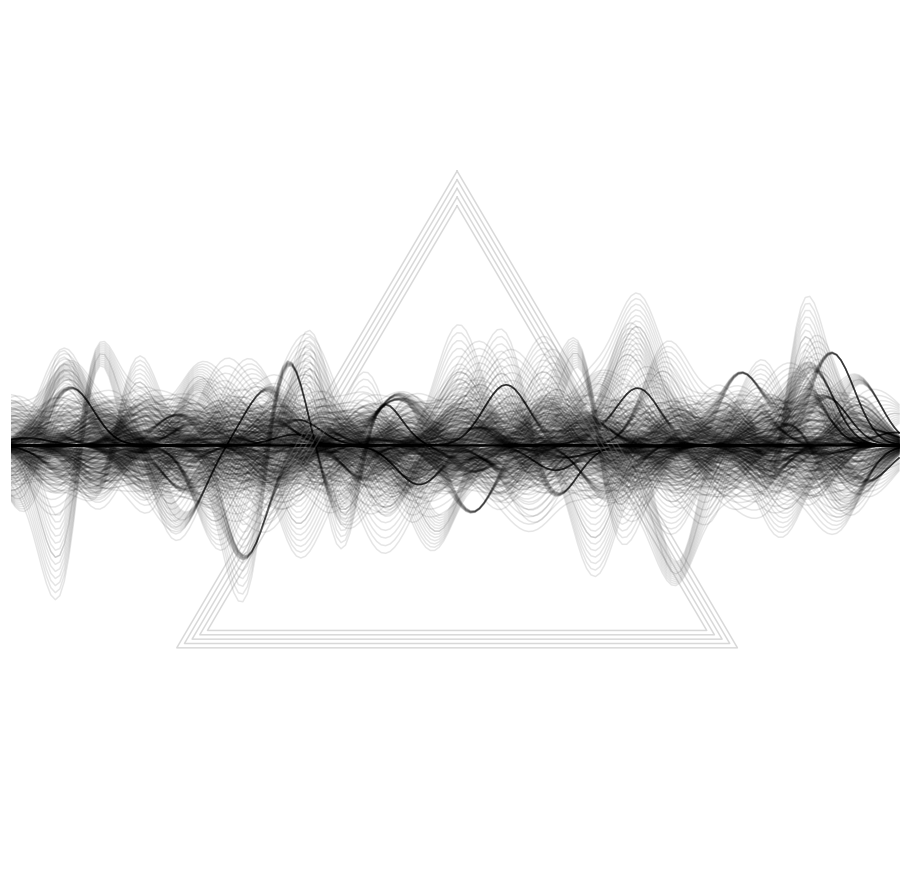

In [16]:
def norm(ys):
    m1 = np.max(ys)
    m2 = abs(np.min(ys))
    m = max(m1,m2)
    ys = ys / m
    return ys
%matplotlib inline
# plt.figure()
fig, ax = plt.subplots(figsize=(16,16))
# plt.fill_between(test_X.ravel(), test_y + uncertainty, test_y - uncertainty, alpha=0.1)
# plt.plot(test_X,test_y+uncertainty)
# u = wave_y*6
# Use a boundary norm instead

# 主线的循环
for l in range(len(mys)):
    main_x = mx
    main_y = mys[l]
    wave_y = wys[l]*2
#     print(wave_y)
#     wave_y = wys[l]*4
    # 每条主线，不同波动的循环
    for i in range(10):
        if i > 6:
            continue
        plt.plot(main_x,main_y+wave_y*i/10,color='black',alpha=0.1)
        plt.plot(main_x,main_y-wave_y*i/10,color='black',alpha=0.1)

        
# 画三角形
pos = get_tri(20,12.56)

h = 0.2
for i in range(5):
    thish = h*i
    posnew = tri_shrink(pos[0],pos[1],pos[2],thish)
    trixs = [posnew[0][0],posnew[1][0],posnew[2][0],posnew[0][0]]
    triys = [posnew[0][1],posnew[1][1],posnew[2][1],posnew[0][1]]
    plt.plot(trixs,triys,color='gray',alpha=0.3)
plt.xticks(())
plt.yticks(())

# 取消边框
for key, spine in ax.spines.items():
    # 'left', 'right', 'bottom', 'top'
    if key == 'right' or key == 'top' or key == 'bottom' or key == 'left':
        spine.set_visible(False)
ax.set_xlim(0, 20)
ax.set_ylim(-10,10)
plt.show()

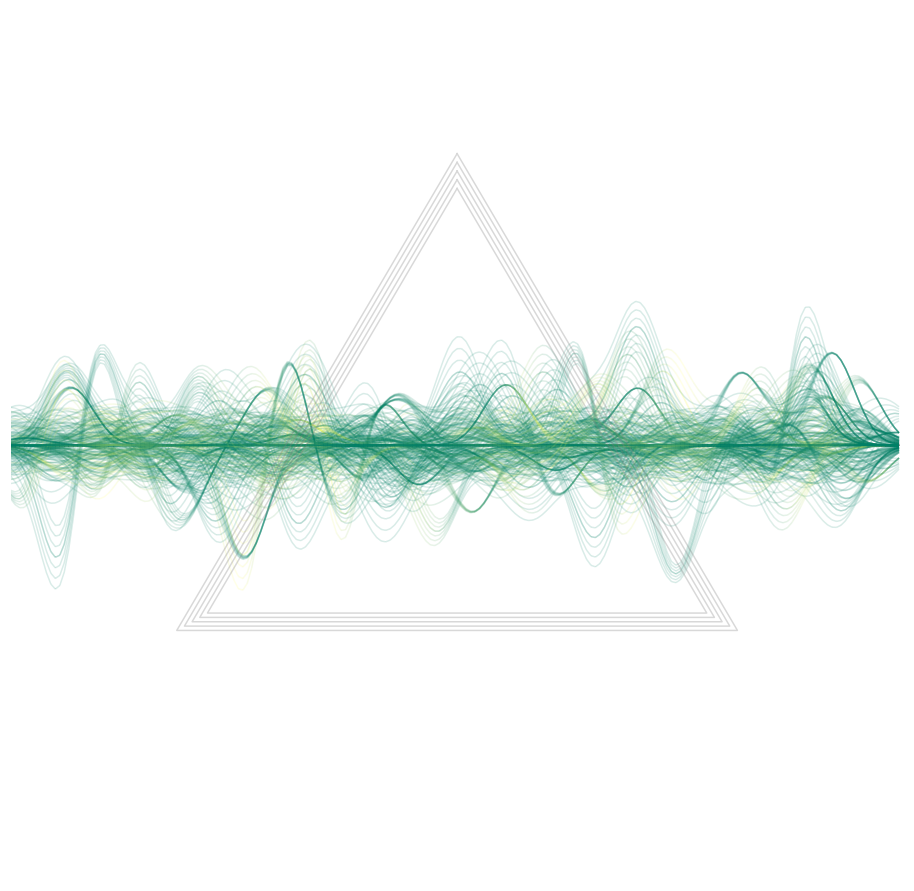

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# dydx = color_y  # first derivative ,used for colormap
# dydx_used = dydx*0.5+np.mean(dydx)
fig, axs = plt.subplots(figsize=(16,16))


line_num = 8
for l in range(len(mys)):
    main_x = mx
    main_y = mys[l]
    wave_y = wys[l]*3
    dydx = cys[l]
    for i in range(line_num):
        x = main_x
        if i < line_num/2:
            y = main_y+wave_y*i/10
        else:
            y = main_y-wave_y*(i-line_num/2)/10
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)


        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(dydx.min(), dydx.max())
        lc = LineCollection(segments, cmap='summer', norm=norm,alpha=0.15)
        # Set the values used for colormapping
        lc.set_array(dydx)
        line = axs.add_collection(lc)
plt.xticks(())
plt.yticks(())

# 画三角形
pos = get_tri(20,12.56)

h = 0.2
for i in range(5):
    thish = h*i
    posnew = tri_shrink(pos[0],pos[1],pos[2],thish)
    trixs = [posnew[0][0],posnew[1][0],posnew[2][0],posnew[0][0]]
    triys = [posnew[0][1],posnew[1][1],posnew[2][1],posnew[0][1]]
    plt.plot(trixs,triys,color='gray',alpha=0.3)

# 取消边框
for key, spine in axs.spines.items():
    # 'left', 'right', 'bottom', 'top'
    if key == 'right' or key == 'top' or key == 'bottom' or key == 'left':
        spine.set_visible(False)

axs.set_xlim(0, 20)
axs.set_ylim(-10,10)
plt.savefig('lines.png',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
for i in range(1):
    plt.plot(scale_wave(wys[i]),color='red')
    plt.plot(wys[i],color='green')
#     plt.plot(mys[i],color='green')
#     plt.plot(mys[i]*wys[i]*2,color='blue')
plt.show()

In [ ]:

for wave in wys:
    print(ex0(wave))

In [ ]:

scale_wave(np.array([0.1,0.5]))